In [87]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spotipy
import spotipy.util as util


In [88]:
df = pd.read_csv("spotifytoptracks.csv")

In [89]:
spotify_numeric = df._get_numeric_data()
#spotify_numeric

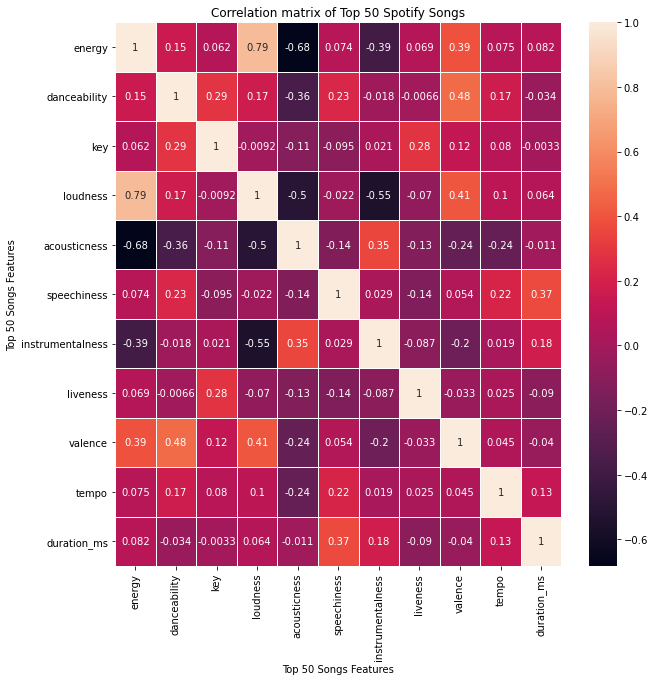

In [90]:
corr = spotify_numeric.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,linewidths = .5, annot = True, ax=ax)
plt.title("Correlation matrix of Top 50 Spotify Songs")
plt.xlabel('Top 50 Songs Features')
plt.ylabel('Top 50 Songs Features')
plt.show()

In [91]:
#use seaborn for the correlation they have on each other, use heatmap 

In [92]:
CLIENT_ID = "097a406c48224ecd8a501a47b630e611" # enter your own here
CLIENT_SECRET = "6858c3550f924f2e8f5f7f89ca2e4dc7" # enter your own here

In [93]:
token = spotipy.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

<ipython-input-93-a3b452d1525e>:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  cache_token = token.get_access_token()


In [94]:
playlist_creator = "spotify"
playlist_id = "37i9dQZF1DX5IDTimEWoTd"

In [95]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [96]:
playlist_df = analyze_playlist(playlist_creator, playlist_id)[0:50]
playlist_df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Ben Platt,Sing To Me Instead,Grow As We Go,6hYvw3LLTViP2mT4MpDNmT,0.458,0.137,8,-14.083,1,0.0355,0,0.150,0.437,80.824,249427,4
1,Niall Horan,Put A Little Love On Me,Put A Little Love On Me,1hCTxutVVYvggAQcUUUZAT,0.584,0.465,10,-4.880,1,0.0262,0,0.106,0.299,95.969,224586,4
2,Jeremy Zucker,this is how you fall in love,this is how you fall in love,0742PcMPo2Akmo4vHC29VZ,0.520,0.204,7,-12.488,1,0.0355,0.000025,0.126,0.274,79.682,174587,4
3,Justin Bieber,Justice,Off My Face,3T03rPwlL8NVk1yIaxeD8U,0.509,0.228,4,-8.680,1,0.0332,0,0.104,0.586,90.674,156468,4
4,James Arthur,Falling Like The Stars,Falling Like The Stars,15xWRPHQMeqgdkGzInx3PY,0.296,0.351,6,-9.538,1,0.0351,0.000002,0.110,0.190,177.596,212720,3


In [97]:
my_df_numeric = playlist_df.drop(['artist','album','track_name','track_id','mode','time_signature'],axis=1)
#my_df_numeric['key','duration_ms']=pd.to_numeric(my_df_numeric['key','duration_ms'])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'danceability'),
  Text(0, 1.5, 'energy'),
  Text(0, 2.5, 'loudness'),
  Text(0, 3.5, 'speechiness'),
  Text(0, 4.5, 'liveness'),
  Text(0, 5.5, 'valence'),
  Text(0, 6.5, 'tempo')])

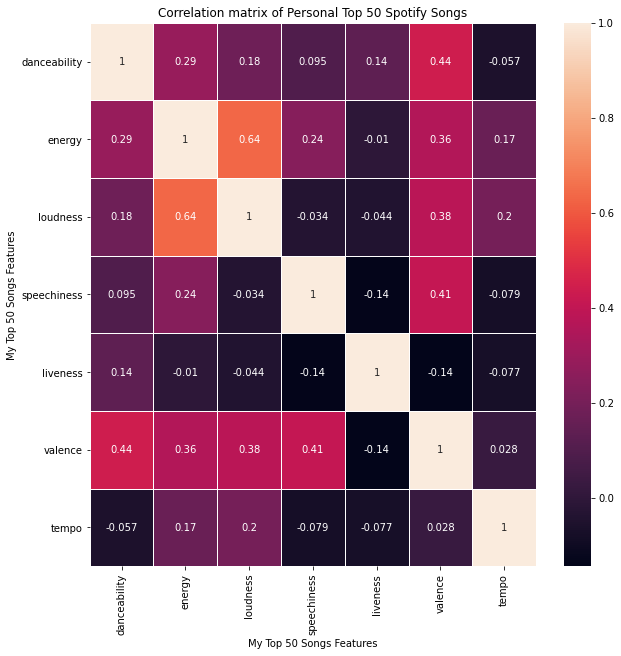

In [98]:
corr1 = my_df_numeric.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr1,linewidths = .5, annot = True, ax=ax)
plt.title("Correlation matrix of Personal Top 50 Spotify Songs")
plt.xlabel('My Top 50 Songs Features')
plt.xticks(rotation=90)
plt.ylabel('My Top 50 Songs Features')
plt.yticks(rotation=0)

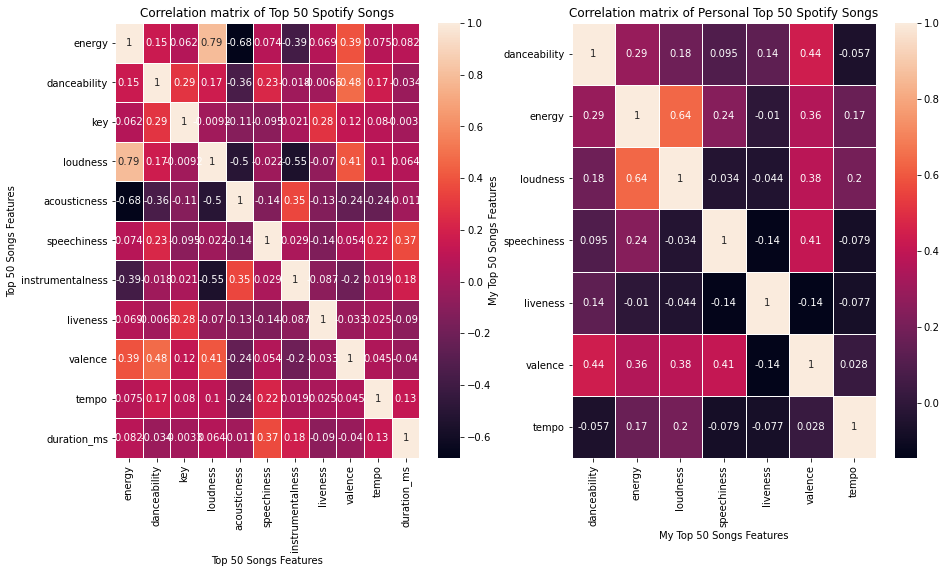

In [99]:
#this is displaying the two correlations side by side
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)

sns.heatmap(corr, annot = True,linewidths = .5)

plt.title("Correlation matrix of Top 50 Spotify Songs")

plt.xlabel('Top 50 Songs Features')

plt.ylabel('Top 50 Songs Features')

plt.subplot(1,2,2)

sns.heatmap(corr1, annot = True,linewidths = .5)

plt.title("Correlation matrix of Personal Top 50 Spotify Songs")

plt.xlabel('My Top 50 Songs Features')
plt.xticks(rotation=90)
plt.ylabel('My Top 50 Songs Features')
plt.yticks(rotation=0)
plt.show()

In [100]:
print(spotify_numeric.mean())
print( )
print(my_df_numeric.mean())
spotify_numeric=spotify_numeric.drop(['tempo','duration_ms'], axis =1)
my_df_numeric=my_df_numeric.drop(['tempo','duration_ms'], axis =1)

energy                   0.609300
danceability             0.716720
key                      5.720000
loudness                -6.225900
acousticness             0.256206
speechiness              0.124158
instrumentalness         0.015962
liveness                 0.196552
valence                  0.555710
tempo                  119.690460
duration_ms         199955.360000
dtype: float64

danceability             0.524300
energy                   0.311598
key                      5.680000
loudness               -10.351500
speechiness              0.041530
instrumentalness         0.010400
liveness                 0.135798
valence                  0.339594
tempo                  111.721980
duration_ms         209700.180000
dtype: float64


<AxesSubplot:>

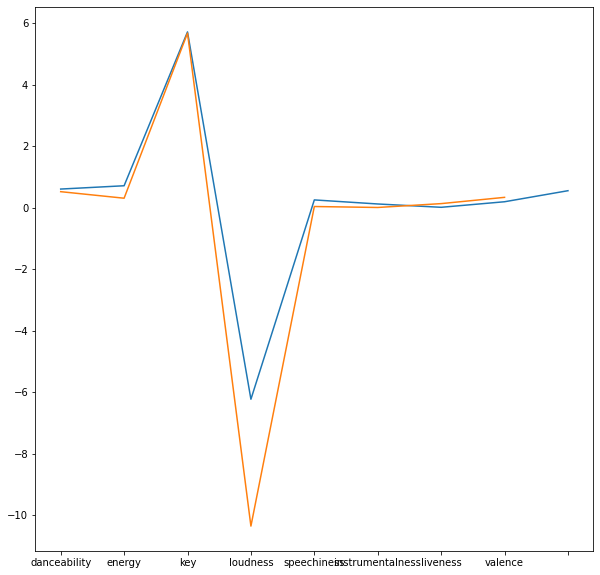

In [101]:
ax = spotify_numeric.mean().plot(figsize=(10,10))
my_df_numeric.mean().plot(ax=ax)